In [259]:
import collections
from math import log
import sys
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import matplotlib.colors as mcolors

from matplotlib import cm

color_palette = ['lightcoral', 'gold', 'skyblue', 'plum', 'palegreen', 'lightcyan', 'lavender', 'yellow', 'pink']
# color_palette = ['tab:blue', 'tab:orange','tab:green', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'yellow', 'cornflowerblue', '']
#colors = iter([plt.cm.tab20(i) for i in range(20)])

In [260]:
dataset = pd.read_csv('company_climate_dataset.csv')

In [261]:
dataset.head()

,company,headquarters_country,usa_state,num_employees,net_worth,ghg_emissions_metric_tons,ghg_emissions_year,water_withdrawal_cubic_meters,water_withdrawal_year,avg_annual_PUE,...,percent_renewable_energy,money_in_renewables_USdollars,waste_generated_metric_tons,waste_generated_year,highest_leed_certification,ev_charging_ports,carbon_neutral_shipments,percent_product_recycled_materials,reported_raw_materials,conflict_free_supply_change
0,Alphabet (Google),United States,California,"150,028.00","1,453.76",9071847.4,2021,11365.225,2021.0,1.1,...,100,3300000000,28864,2021.0,platinum,yes,yes,100,"cobalt, tantalum, tin, tungsten",not sure
1,Microsoft,United States,Washington,"182,268.00","1,893.24",123704,2021,7657,2020.0,1.125,...,100,200000000,3189,2021.0,platinum,yes,some,61,"graphite, silicon, gold, tantalum, tin, tungsten",yes
2,Meta (Facebook),United States,California,"71,970.00",517.69,7550000,2020,3726000,2021.0,1.1,...,100,7400000000,unsure,NaN,platinum,yes,some,unsure,"lithium, gold, tantalum, tin, tungsten",no
3,Tesla,United States,Texas,"70,757.00",734.97,1954000,2021,2874904,2020.0,NaN,...,100,unsure,32877.282,2021.0,silver,yes,some,unsure,"cobalt, lithium, graphite, silicon, aluminum, ...",unsure
4,Apple,United States,California,"154,000.00","2,223.03",22600000,2020,5850817.83,2020.0,unsure,...,100,4700000000,16556.122,2020.0,platinum,yes,yes,> 0,"cobalt, lithium, silicon, gold, silver, alumin...",some


In [262]:
dataset['num_employees'] = dataset['num_employees'].str.replace(',', '').astype(float)

In [263]:
employee_order = dataset.sort_values(by=['num_employees'])

In [264]:
net_worth_order = dataset.sort_values(by=['net_worth'])

In [265]:
net_worth_order

,company,headquarters_country,usa_state,num_employees,net_worth,ghg_emissions_metric_tons,ghg_emissions_year,water_withdrawal_cubic_meters,water_withdrawal_year,avg_annual_PUE,...,percent_renewable_energy,money_in_renewables_USdollars,waste_generated_metric_tons,waste_generated_year,highest_leed_certification,ev_charging_ports,carbon_neutral_shipments,percent_product_recycled_materials,reported_raw_materials,conflict_free_supply_change
5,Amazon,United States,Washington,170000.0,"1,091.91",unsure,unsure,480000000,2020.0,1.7,...,65,unsure,272155.422,2020.0,platinum,yes,some,unsure,"cobalt, silicon, silver, aluminum, tantalum, t...",no
0,Alphabet (Google),United States,California,150028.0,"1,453.76",9071847.4,2021,11365.225,2021.0,1.1,...,100,3300000000,28864,2021.0,platinum,yes,yes,100,"cobalt, tantalum, tin, tungsten",not sure
1,Microsoft,United States,Washington,182268.0,"1,893.24",123704,2021,7657,2020.0,1.125,...,100,200000000,3189,2021.0,platinum,yes,some,61,"graphite, silicon, gold, tantalum, tin, tungsten",yes
24,Intuit,United States,California,14200.0,100.08,23481,2020,unsure,2020.0,unsure,...,100,unsure,460.7781803,2020.0,gold,yes,yes,unsure,"gold, tantalum, tin, tungsten",unsure
21,IBM,United States,New York,282100.0,127.00,"880,188",2020,unsure,2021.0,1.67,...,59.3,unsure,23000,2020.0,platinum,yes,no,unsure,"cobalt, lithium, silicon, tantalum, tin, tungs...",no
17,Qualcomm,United States,California,45000.0,146.24,3943605,2021,3514127.57,2020.0,1.18,...,50,36000000,2948,2021.0,silver,yes,unsure,unsure,"cobalt, silicon, gold, tantalum, tin, tungsten...",no
32,Jingdong Mall (JD.com),China,NaN,310000.0,149.30,2275935.69,2020,unsure,NaN,1.3,...,unsure,unsure,25768.96,2020.0,unsure,yes,some,unsure,NaN,unsure
19,Texas Instruments,United States,Texas,31000.0,154.57,1920000,2020,18560000,NaN,NaN,...,18.14,unsure,41800,2020.0,gold,yes,no,unsure,"cobalt, lithium, graphite, silicon, gold, tant...",no
18,AMD,United States,California,22500.0,156.65,29916,2020,151000,2020.0,NaN,...,71,unsure,488,2020.0,gold,yes,no,unsure,"cobalt, lithium, graphite, silicon, gold, silv...",no
22,Salesforce,United States,California,73541.0,158.87,1096000,2021,492103.5319,2021.0,1.39,...,100,unsure,unsure,NaN,certified,yes,NaN,unsure,NaN,NaN


## Headquarters for each company

In [266]:
def label_function(val):
    return f'{val / 100 * len(dataset):.0f}\n{val:.0f}%'

Text(0, 0.5, '')

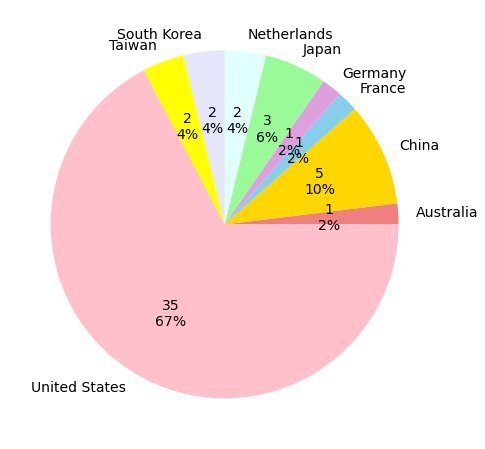

In [267]:
country_pi = dataset.groupby('headquarters_country').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 14
    },
                                  colors=color_palette, figsize=(8,8))

#country_pi.set_title('Headquarter Locations for Companies', size=20)
country_pi.set_ylabel(None)

## Datacenter Things

There are 36 companies which report having datacenters from the companies we evaluated. 

For 17 of those companies we could not find any reported values for annual average PUE. This may be as a result of lack of transparency as well as inadequte access to the measurements. Therefore we have 19 companies that we can evaluate in terms of average annual PUE. The lowest reported PUE was by Cisco which was a value of 1.05. Companies with the best PUE values were Cisco, Intel, Alphabet, Meta, and Microsoft respectively. The highest reported PUE was by Amazon which was a value of 1.7. The companies with the worst scoring performance include Amazon, ADP, IBM, and Oracle. The average PUE reported by all the companies with datacenters was around 1.31. 

In [268]:
datacenter_data = dataset[dataset['avg_annual_PUE'].notna()]

In [269]:
datacenter_data

,company,headquarters_country,usa_state,num_employees,net_worth,ghg_emissions_metric_tons,ghg_emissions_year,water_withdrawal_cubic_meters,water_withdrawal_year,avg_annual_PUE,...,percent_renewable_energy,money_in_renewables_USdollars,waste_generated_metric_tons,waste_generated_year,highest_leed_certification,ev_charging_ports,carbon_neutral_shipments,percent_product_recycled_materials,reported_raw_materials,conflict_free_supply_change
0,Alphabet (Google),United States,California,150028.0,"1,453.76",9071847.4,2021,11365.225,2021.0,1.1,...,100,3300000000,28864,2021.0,platinum,yes,yes,100,"cobalt, tantalum, tin, tungsten",not sure
1,Microsoft,United States,Washington,182268.0,"1,893.24",123704,2021,7657,2020.0,1.125,...,100,200000000,3189,2021.0,platinum,yes,some,61,"graphite, silicon, gold, tantalum, tin, tungsten",yes
2,Meta (Facebook),United States,California,71970.0,517.69,7550000,2020,3726000,2021.0,1.1,...,100,7400000000,unsure,NaN,platinum,yes,some,unsure,"lithium, gold, tantalum, tin, tungsten",no
4,Apple,United States,California,154000.0,"2,223.03",22600000,2020,5850817.83,2020.0,unsure,...,100,4700000000,16556.122,2020.0,platinum,yes,yes,> 0,"cobalt, lithium, silicon, gold, silver, alumin...",some
5,Amazon,United States,Washington,170000.0,"1,091.91",unsure,unsure,480000000,2020.0,1.7,...,65,unsure,272155.422,2020.0,platinum,yes,some,unsure,"cobalt, silicon, silver, aluminum, tantalum, t...",no
8,Tencent,China,NaN,112771.0,431.30,5111000,2021,3635172.35,2020.0,1.25,...,> 0,unsure,unsure,NaN,gold,yes,no,unsure,"cobalt, lithium, graphite",no
10,Alibaba,China,NaN,251462.0,237.72,9514000,2020,unsure,2021.0,1.13,...,unsure,unsure,unsure,NaN,unsure,yes,no,unsure,NaN,no
12,Cisco,United States,California,79500.0,173.31,174494,2021,2902,2021.0,1.05,...,85,100000000,5863,2020.0,gold,yes,yes,unsure,"cobalt, lithium, gold, tantalum, tungsten",yes
14,Oracle,United States,Texas,132000.0,178.87,369300,2020,unsure,NaN,1.5,...,59,unsure,621.4229077,2020.0,platinum,yes,no,NaN,NaN,NaN
15,Adobe,United States,California,25988.0,183.56,554125.676,2019,unsure,2020.0,unsure,...,> 0,unsure,unsure,NaN,certified,yes,NaN,NaN,NaN,yes


In [270]:
has_pue = datacenter_data[datacenter_data.avg_annual_PUE != 'unsure']

In [271]:
has_pue = has_pue.sort_values(by=['avg_annual_PUE'])

In [272]:
new_pue = has_pue['avg_annual_PUE'].astype(float)

In [273]:
has_pue['avg_annual_PUE'] = pd.to_numeric(has_pue['avg_annual_PUE'], downcast="float")

In [274]:
has_pue['avg_annual_PUE'].mean()

1.3139473

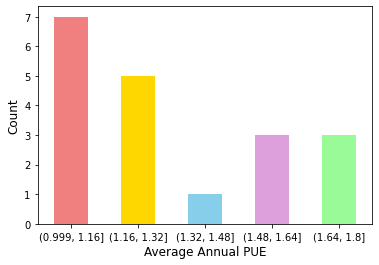

In [275]:
out = pd.cut(has_pue['avg_annual_PUE'], bins=[1, 1.16, 1.32, 1.48, 1.64, 1.8], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color=color_palette, figsize=(6,4))
ax.set_ylabel('Count', size=12)
ax.set_xlabel('Average Annual PUE', size=12)

plt.show()

### waste diverted

For the companies with datacenters we also attempted to collect the percentage of waste that was diverted and the ghg emissions by the data center by itself. This information was pretty challenging to find. 

We ended up with 15 companies that we can evaluate in terms of waste diverted from landfills in terms of their datacenters. The lowest reported waste diverted is Equinix, and the highest reported is Cisco with 99.9. The average waste diverted is around 80%. However we should note that companies are more likely to release information regarding the waste they divert from data centers if they are doing well in terms of being envioronmental. Therefore 80% is a pretty inflated amount in terms of being representative of companies in general.

In [276]:
datacenter_data_1 = dataset[dataset['percent_waste_diverted'].notna()]

has_waste = datacenter_data_1[datacenter_data_1.percent_waste_diverted != 'unsure']
has_waste = has_waste[has_waste.percent_waste_diverted != '<1']


In [277]:
has_waste['percent_waste_diverted'] = pd.to_numeric(has_waste['percent_waste_diverted'], downcast="float")

In [278]:
has_waste = has_waste.sort_values(by=['percent_waste_diverted'])
has_waste[['company', 'percent_waste_diverted']].sort_values(by=['percent_waste_diverted'])

,company,percent_waste_diverted
38,Equinix,55.000000
21,IBM,57.000000
39,Micron Technology,74.139999
17,Qualcomm,77.000000
24,Intuit,77.000000
14,Oracle,80.000000
28,Applied Materials,80.000000
0,Alphabet (Google),81.000000
33,Analog Devices,83.000000
1,Microsoft,90.000000


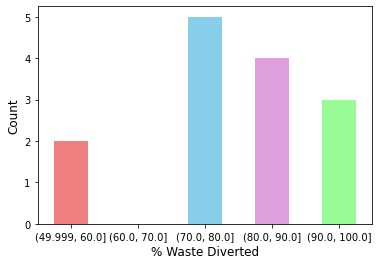

In [279]:
out = pd.cut(has_waste['percent_waste_diverted'], bins=[50, 60, 70, 80, 90, 100], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color=color_palette, figsize=(6,4))
#ax.set_title('Frequency for % of Waste Diverted in Datacenters', size=16, y = 1.08)
ax.set_ylabel('Count', size=12)
ax.set_xlabel('% Waste Diverted', size=12)

plt.show()

In [280]:
has_waste['percent_waste_diverted'].mean()

80.64571

### ghg emissions datacenter

Next, for ghg emissions in terms of data centers we ended up with 8 companies that we could evaluate. The lowest reported ghg emissions was Alphabet and PayPal who are both carbon neutral. The company with the most amount of emissions was Microsoft from their datacenters. 

In [281]:
data_ghg = dataset[dataset['ghg_emissions_datacenters_metric_tons'].notna()]

In [282]:
data_ghg = data_ghg[data_ghg.ghg_emissions_datacenters_metric_tons != 'unsure']

In [283]:
data_ghg

,company,headquarters_country,usa_state,num_employees,net_worth,ghg_emissions_metric_tons,ghg_emissions_year,water_withdrawal_cubic_meters,water_withdrawal_year,avg_annual_PUE,...,percent_renewable_energy,money_in_renewables_USdollars,waste_generated_metric_tons,waste_generated_year,highest_leed_certification,ev_charging_ports,carbon_neutral_shipments,percent_product_recycled_materials,reported_raw_materials,conflict_free_supply_change
0,Alphabet (Google),United States,California,150028.0,"1,453.76",9071847.4,2021,11365.225,2021.0,1.1,...,100,3300000000,28864,2021.0,platinum,yes,yes,100,"cobalt, tantalum, tin, tungsten",not sure
1,Microsoft,United States,Washington,182268.0,"1,893.24",123704,2021,7657,2020.0,1.125,...,100,200000000,3189,2021.0,platinum,yes,some,61,"graphite, silicon, gold, tantalum, tin, tungsten",yes
2,Meta (Facebook),United States,California,71970.0,517.69,7550000,2020,3726000,2021.0,1.1,...,100,7400000000,unsure,NaN,platinum,yes,some,unsure,"lithium, gold, tantalum, tin, tungsten",no
4,Apple,United States,California,154000.0,"2,223.03",22600000,2020,5850817.83,2020.0,unsure,...,100,4700000000,16556.122,2020.0,platinum,yes,yes,> 0,"cobalt, lithium, silicon, gold, silver, alumin...",some
8,Tencent,China,NaN,112771.0,431.30,5111000,2021,3635172.35,2020.0,1.25,...,> 0,unsure,unsure,NaN,gold,yes,no,unsure,"cobalt, lithium, graphite",no
15,Adobe,United States,California,25988.0,183.56,554125.676,2019,unsure,2020.0,unsure,...,> 0,unsure,unsure,NaN,certified,yes,NaN,NaN,NaN,yes
27,Servicenow,United States,California,16881.0,85.55,24338,2020,unsure,2020.0,unsure,...,100,unsure,unsure,NaN,unsure,yes,yes,NaN,NaN,NaN
29,PayPal,United States,California,26500.0,94.13,24400,2021,293000,NaN,1.49,...,82,unsure,unsure,NaN,certified,yes,NaN,NaN,NaN,NaN


In [284]:
data_ghg[['company', 'ghg_emissions_datacenters_metric_tons']].sort_values(by=['ghg_emissions_datacenters_metric_tons'])

,company,ghg_emissions_datacenters_metric_tons
0,Alphabet (Google),0
29,PayPal,0
27,Servicenow,10022
4,Apple,1177189
1,Microsoft,16000000
15,Adobe,26238
2,Meta (Facebook),2756000
8,Tencent,5100000


In [285]:
data_ghg['ghg_emissions_datacenters_metric_tons'] = pd.to_numeric(data_ghg['ghg_emissions_datacenters_metric_tons'], downcast="float")

# data_ghg = data_ghg.sort_values(by=data_ghg['ghg_emissions_datacenters_metric_tons'])


In [286]:
datacenter_ghg = data_ghg[['company', 'ghg_emissions_datacenters_metric_tons']].sort_values(by=['ghg_emissions_datacenters_metric_tons'])

/Users/NiharikaBhaskar/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


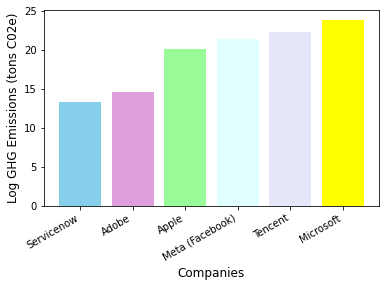

In [287]:
x = datacenter_ghg['company']
y = np.log2(datacenter_ghg['ghg_emissions_datacenters_metric_tons'])

plt.bar(x,y, color=color_palette)
plt.xlabel('Companies', size=12)
plt.ylabel('Log GHG Emissions (tons C02e)', size=12)

#plt.title('Companies w/ Datacenters: Reported GHG emissions', size=16, y=1.08)

plt.gcf().autofmt_xdate() 
plt.show()

## Waste Generated

480000000

In [288]:
waste = dataset[dataset['waste_generated_metric_tons'].notna()]
waste = waste[waste.waste_generated_metric_tons != 'unsure']

In [289]:
waste = waste[['company', 'waste_generated_metric_tons']]

In [290]:
waste['waste_generated_metric_tons'] = pd.to_numeric(waste['waste_generated_metric_tons'], downcast="float")

In [291]:
waste = waste[['company', 'waste_generated_metric_tons']].sort_values(by=['waste_generated_metric_tons'])

In [292]:
waste['company'][0:3]

48    Atlassian
30      Keyence
23          SAP
Name: company, dtype: object

In [293]:
waste['waste_generated_metric_tons'][0:3]

48    124.0
30    136.0
23    261.0
Name: waste_generated_metric_tons, dtype: float32

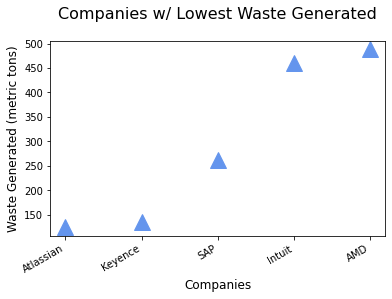

In [294]:
x = waste['company'][0:5]
y = waste['waste_generated_metric_tons'][0:5]
plt.plot(x,y, '^', color='cornflowerblue', markersize=16)
plt.xlabel('Companies', size = 12)
plt.ylabel('Waste Generated (metric tons)', size = 12)

plt.title('Companies w/ Lowest Waste Generated', size=16, y=1.08)

plt.gcf().autofmt_xdate() 
plt.show()

In [295]:
waste['company'][-3:]

16       Intel
44    SK Hynix
9      Samsung
Name: company, dtype: object

In [296]:
waste['waste_generated_metric_tons'][-3:]

16    3.755745e+05
44    5.721340e+05
9     1.181741e+06
Name: waste_generated_metric_tons, dtype: float32

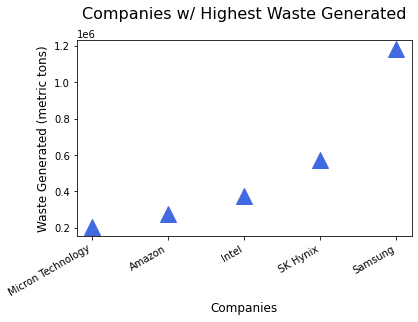

In [297]:
x = waste['company'][-5:]
y = waste['waste_generated_metric_tons'][-5:]
plt.plot(x,y, '^', color='royalblue', markersize=16)
plt.xlabel('Companies', size = 12)
plt.ylabel('Waste Generated (metric tons)', size = 12)

plt.title('Companies w/ Highest Waste Generated', size=16, y=1.08)

plt.gcf().autofmt_xdate() 
plt.show()

When looking foor whether companies provided EV charging ports for employees, it seems as if most companies in the United States have that utility available in at least one location. However outside of the United States, there seemed to be less availabiltiy. 

Moreover, there was almost no information in regards to whether companies had carbon neautral shipping. This is most likely because companies might outsoruce these sort of tasks and may not account for their own impact. There were only 6 companies that claimed to have carbon neutral shipping. Besides, it seemed as if only larger companies had a clear answer for this; companies like Google and Apple. 

Next in terms of the percent of products that contain recycled materials we found little to no information for this in regards to almost all companies.

In [298]:
ship = dataset[dataset['carbon_neutral_shipments'] == 'yes']
ship

,company,headquarters_country,usa_state,num_employees,net_worth,ghg_emissions_metric_tons,ghg_emissions_year,water_withdrawal_cubic_meters,water_withdrawal_year,avg_annual_PUE,...,percent_renewable_energy,money_in_renewables_USdollars,waste_generated_metric_tons,waste_generated_year,highest_leed_certification,ev_charging_ports,carbon_neutral_shipments,percent_product_recycled_materials,reported_raw_materials,conflict_free_supply_change
0,Alphabet (Google),United States,California,150028.0,"1,453.76",9071847.4,2021,11365.225,2021.0,1.1,...,100,3300000000,28864,2021.0,platinum,yes,yes,100,"cobalt, tantalum, tin, tungsten",not sure
4,Apple,United States,California,154000.0,"2,223.03",22600000,2020,5850817.83,2020.0,unsure,...,100,4700000000,16556.122,2020.0,platinum,yes,yes,> 0,"cobalt, lithium, silicon, gold, silver, alumin...",some
12,Cisco,United States,California,79500.0,173.31,174494,2021,2902,2021.0,1.05,...,85,100000000,5863,2020.0,gold,yes,yes,unsure,"cobalt, lithium, gold, tantalum, tungsten",yes
24,Intuit,United States,California,14200.0,100.08,23481,2020,unsure,2020.0,unsure,...,100,unsure,460.7781803,2020.0,gold,yes,yes,unsure,"gold, tantalum, tin, tungsten",unsure
27,Servicenow,United States,California,16881.0,85.55,24338,2020,unsure,2020.0,unsure,...,100,unsure,unsure,NaN,unsure,yes,yes,NaN,NaN,NaN
31,Booking.com,Netherlands,NaN,19400.0,85.39,118746,2021,unsure,NaN,unsure,...,100,799808,unsure,NaN,unsure,yes,yes,NaN,NaN,NaN


### Conflict Free Supply Change

Text(0, 0.5, '')

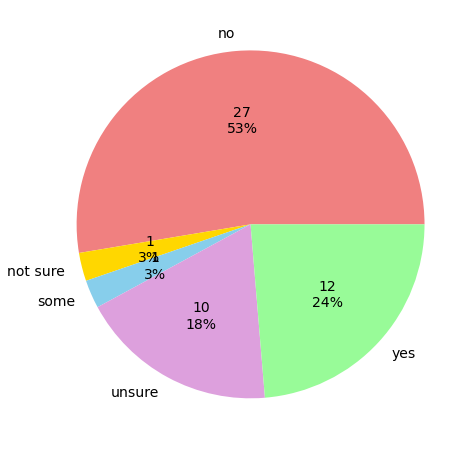

In [299]:
conflict = dataset.groupby('conflict_free_supply_change').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 14},
                                  colors=color_palette, figsize=(8,8))

# conflict.set_title('Conflict Free Supply Chain', size=20)
conflict.set_ylabel(None)
# conflict.set_ylabel('Companies per Respone', size = 16)

### Raw Materials

In [300]:
raw = dataset[dataset['reported_raw_materials'].notna()]
raw = raw[raw.reported_raw_materials != 'unsure']
raw = raw[raw.reported_raw_materials != 'null']

In [301]:
raw = raw[['company', 'reported_raw_materials']]

In [302]:
mask = raw.reported_raw_materials.apply(lambda x: 'cobalt' in x)

In [303]:
df1 = raw[mask]
raw = df1

In [304]:
for i, material_list in raw['reported_raw_materials'].iteritems(): 
    materials = list(material_list.split(", "))
    raw.loc[i].at['reported_raw_materials'] = materials
    # raw.loc[i].at['reported_raw_materials'] = [x.strip(' ') for x in raw['reported_raw_materials'][i]]

In [305]:
raw

,company,reported_raw_materials
0,Alphabet (Google),"[cobalt, tantalum, tin, tungsten]"
3,Tesla,"[cobalt, lithium, graphite, silicon, aluminum,..."
4,Apple,"[cobalt, lithium, silicon, gold, silver, alumi..."
5,Amazon,"[cobalt, silicon, silver, aluminum, tantalum, ..."
6,Taiwan Semiconductor Manufacturing Company,"[cobalt, lithium, graphite, silicon, gold, sil..."
8,Tencent,"[cobalt, lithium, graphite]"
9,Samsung,"[cobalt, silicon, gold, tantalum, tin, tungsten]"
12,Cisco,"[cobalt, lithium, gold, tantalum, tungsten]"
13,ASML Holding,"[cobalt, gold, tantalum, tin, tungsten]"
16,Intel,"[cobalt, lithium, graphite, silicon, gold, sil..."


In [306]:
raw_material_list = []
for material_list in raw['reported_raw_materials']: 
    for r in material_list:
        if r not in raw_material_list:
            raw_material_list.append(r)

In [307]:
raw

,company,reported_raw_materials
0,Alphabet (Google),"[cobalt, tantalum, tin, tungsten]"
3,Tesla,"[cobalt, lithium, graphite, silicon, aluminum,..."
4,Apple,"[cobalt, lithium, silicon, gold, silver, alumi..."
5,Amazon,"[cobalt, silicon, silver, aluminum, tantalum, ..."
6,Taiwan Semiconductor Manufacturing Company,"[cobalt, lithium, graphite, silicon, gold, sil..."
8,Tencent,"[cobalt, lithium, graphite]"
9,Samsung,"[cobalt, silicon, gold, tantalum, tin, tungsten]"
12,Cisco,"[cobalt, lithium, gold, tantalum, tungsten]"
13,ASML Holding,"[cobalt, gold, tantalum, tin, tungsten]"
16,Intel,"[cobalt, lithium, graphite, silicon, gold, sil..."


In [308]:
raw_dict = {}

for m in raw_material_list:
    ctr = 0
    for material_list in raw['reported_raw_materials']: 
        if m in material_list:
            ctr+=1
    raw_dict[m] = ctr

In [309]:
raw_dict.pop('null')

1

In [310]:
raw_dict

{'cobalt': 23,
 'tantalum': 22,
 'tin': 19,
 'tungsten': 22,
 'lithium': 16,
 'graphite': 10,
 'silicon': 15,
 'aluminum': 10,
 'nickel': 3,
 'manganese': 1,
 'iron': 2,
 'gold': 18,
 'silver': 9,
 'neodymium': 1,
 'praseodymium': 1,
 'dysprosium': 1,
 'copper': 7,
 'natural graphite': 1,
 'bismuth': 1,
 'boron': 1,
 'cerium': 1,
 'chromium': 1,
 'mercury': 1,
 'lead': 1,
 'germanium': 1,
 'copper,': 1,
 'cadmium': 1}

In [311]:
# Get the Keys and store them in a list
labels = list(raw_dict.keys())

# Get the Values and store them in a list
values = list(raw_dict.values())

data = {'raw_material': labels, 'count': values}
raw_count = pd.DataFrame.from_dict(data)

In [312]:
raw_count

,raw_material,count
0,cobalt,23
1,tantalum,22
2,tin,19
3,tungsten,22
4,lithium,16
5,graphite,10
6,silicon,15
7,aluminum,10
8,nickel,3
9,manganese,1


In [313]:
raw_count_greater_1 = raw_count[raw_count != 1]

In [314]:
raw_count_greater_1 = raw_count_greater_1[raw_count_greater_1['count'].notna()]

In [315]:
raw_count_greater_1

,raw_material,count
0,cobalt,23.0
1,tantalum,22.0
2,tin,19.0
3,tungsten,22.0
4,lithium,16.0
5,graphite,10.0
6,silicon,15.0
7,aluminum,10.0
8,nickel,3.0
10,iron,2.0


Text(0, 0.5, '')

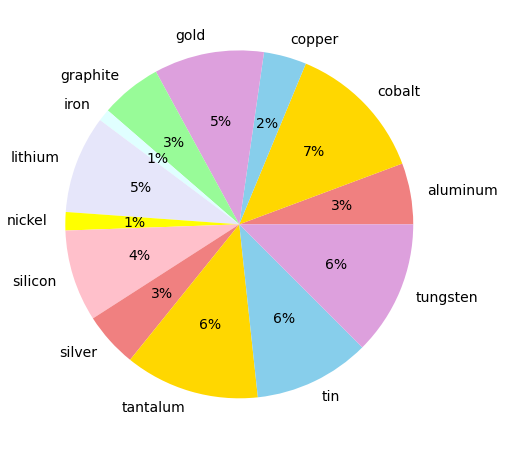

In [318]:
conflict = raw_count_greater_1.groupby(['raw_material']).sum().plot(kind='pie', autopct=label_function_2, textprops={'fontsize': 14},
                                  colors=color_palette, figsize=(8,8), y='count', legend=False)

#conflict.set_title('% of Companies Reporting Raw Material Used', size=20)
conflict.set_ylabel(None)

In [317]:
def label_function_2(val):
    return f'{val / 100 * len(dataset):.0f}%'